In [1]:
%matplotlib inline
import scipy
import sympy
from modsim import *
import numpy as np
# Average statistics.
# Grams of ethanol consumed.
alcohol_consumed = 15
# Absorption rate constant. 3.18 is mean blood value.
k = 3.18
# BAC. .04 is the legal driving limit, though you should never drink and drive!
BAC = .04 
# Elimination rate constant. .163 is mean blood value.
beta = .163
# Body fat ratio. .67 for women, .73 men.
ratio = .73
# Weight.
weight = 70
# Liters of blood in human body
blood_amount = 5
#


class simplistic_model():
    """
    One-compartment model for alcohol absorption and elimination.
    """
    def __init__(self):
        """
        Constructor.
        """
        pass
    @staticmethod   
    def absorb_alcohol(d, t, w=weight):
        """
        Returns the amount of alcohol absorbed.
        """
        return ((d * (1-np.exp(-k*t)))/(ratio*w))
    
    @staticmethod   
    def eliminate_alcohol(t):
        """
        Returns the amount of alcohol eliminated
        """
        return beta * t

    @staticmethod   
    def model_alcohol_processing(d, t):
        """
        Simulates alcohol processing with a timeseries.
        TODO this is currently untested but pushing anyways.
        h = number of hours.
        d = dosage in grams of ethanol.
        """
        result = TimeSeries()
        for h in linrange(0, t):
            result[h] = (simplistic_model.absorb_alcohol(d, (h)) - simplistic_model.eliminate_alcohol((h)))/blood_amount
            if result[h] <= 0:
                result[h] = 0
        return result
    
    @staticmethod
    def model_processing_after_eating(d, t, time_of_eating, initial_weight, weight_gain, time_of_eating_2, weight_gain_2, food_2 = None):
        """
        Simulates alcohol processing and factors in weight gain as well.
        d = dosage in hours
        If food_2 is None, then simulation will run from 0 to time_of_eating to t. Else, it should run from 0 to time_of_eating to time_of_eating_2 to t
        """
        

        if food_2 is None:
            result = TimeSeries()
            for i in linrange(0, time_of_eating):
                result[i] = (simplistic_model.absorb_alcohol(d, (i), initial_weight) - simplistic_model.eliminate_alcohol((i)))/blood_amount
                if result[i] <= 0:
                    result[i] = 0
            for j in linrange(time_of_eating, t):
                result[j] = (simplistic_model.absorb_alcohol(d, (j), (initial_weight + weight_gain)) - simplistic_model.eliminate_alcohol((j)))/blood_amount
                if result[j] <= 0:
                    result[j] = 0
            return result
        else:
            result = TimeSeries()
            for i in linrange(0, time_of_eating):
                result[i] = (simplistic_model.absorb_alcohol(d, (i), initial_weight) - simplistic_model.eliminate_alcohol((i)))/blood_amount
                if result[i] <= 0:
                    result[i] = 0
            for j in linrange(time_of_eating, time_of_eating_2):
                result[j] = (simplistic_model.absorb_alcohol(d, (j), (initial_weight + weight_gain)) - simplistic_model.eliminate_alcohol((j)))/blood_amount
                if result[j] <= 0:
                    result[j] = 0
            for h in linrange(time_of_eating_2, t):
                result[h] = (simplistic_model.absorb_alcohol(d, (h), (initial_weight + weight_gain + weight_gain_2)) - simplistic_model.eliminate_alcohol((h)))/blood_amount
                if result[h] <= 0:
                    result[h] = 0
            return result
        
    @staticmethod   
    def weight_based_on_bac(t, input_BAC):
        """
        Returns the weight of the individual based on static BAC and time.
        """
        return (alcohol_consumed*(1-np.exp(-k*t)))/((input_BAC + beta*t)*ratio)
    
    @staticmethod   
    def BAC_based_on_weight(t, input_weight):
        """
        Returns the BAC of the individual based on static weight and time.
        """
    
        return ((alcohol_consumed*(1-np.exp(-k*t))/(ratio*input_weight)) - beta*t)
        

class three_compartment_model():
    """
    Three-compartment model for alcohol absorption and
    """
    def __init__(self, y1):
        """
        Constructor.
        """
        self.y1 = y1
        self.y2 = 0
        self.y3 = 0
        self.results = TimeSeries()
        
    @staticmethod
    def model_alcohol_processing(t):
        model = three_compartment_model(.30)
        for a in range(t):
            print(a)
            a1 = model.stomach_processing(a)
            a2 = model.small_intestine_processing(model.y1, model.y2, a)
            a3 = model.lean_body_processing(model.y2, model.y3, a)
            results[a] = a1 + a2 + a3
    
    def stomach_processing(self, h):
        """
        Models alcohol processing in the stomach.
        """
        self.results[h] = (abs((three_compartment_model.stomach_processing_slope(self.y1))))/blood_amount
        self.y1 += self.results[h]
        if self.results[h] < 0:
            self.results[h] = 0

    @staticmethod
    def gastric_emptying(d, t):
        """
        Models alcohol processing in the stomach.
        """
        return ((-7.05)/((1 + (.42*(d/.470)**2)*t)))
    
    @staticmethod
    def stomach_processing_slope(c):
        return ((-5.07*c)/(1.00 + (0.42*c)**2)) - 1

    
    @staticmethod
    def small_intestine_slope(y1, y2):
        return ((5.07*y1)/(1.00 + (0.42*y1)**2)) - 7.05*y2

    def small_intestine_processing(c):
        si_eq[h] = abs((((three_compartment_model.small_intestine_slope(self.results[h], )))))/blood_amount
        self.y2 += si_eq[h]
        if si_eq[h] < 0:
            si_eq[h] = 0
        return si_eq[h]
    
    def lean_body_mass_processing(c):
        return 0
        #return (7.05 * self.y2 - ((0.470 * self.y2)))/(0.380 + c)
    
    

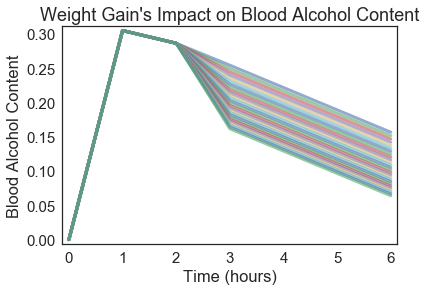

In [2]:
weight_gainz = linrange(0, 25)
for gainz in weight_gainz:
    plot(simplistic_model.model_processing_after_eating(90, 6, 3, 70, gainz, 4, 50, None))
title("Weight Gain's Impact on Blood Alcohol Content")
xlabel("Time (hours)")
ylabel("Blood Alcohol Content")

In [3]:

three_compartment_model.model_alcohol_processing(3)
# plot(three_compartment_model.model_alcohol_processing(.08, 15))
# plot(three_compartment_model.stomach_processing(.33, 15))
# model_processing_after_eating params d, t, time_of_eating, initial_weight, weight_gain, time_of_eating_2, weight_gain_2, food_2 = None

0


TypeError: small_intestine_processing() takes 1 positional argument but 4 were given